<a href="https://colab.research.google.com/github/gaap9/DataScienceCH/blob/main/Preentrega2%2BApud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix - TV Shows and Movies**

*Por: María Gabriela Apud - Curso Data Science - Comisión 29795 - Coderhouse*



# **Storytelling Netflix**

Netflix ha estado en auge y se ha convertido en una de las mayores plataformas de transmisión de películas y series en línea. Este conjunto de datos proporciona información crucial sobre los contenidos proporcionados por Netflix. ¡Comencemos a explorar y aprender juntos!

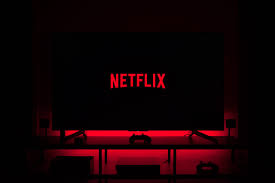

##**Abstract**

En el presente notebook se realiza un análisis de un dataset con información relacionada a la plataforma de streaming Netflix, aquí se exploran aspectos relacionados al contexto comercial y analítico del negocio, se evaluan qué problemas comerciales pueden resolverse con el análisis exploratorio de los datos y se evalúan modelos que contribuyan a la resolución de problemas de interés. El análisis que se plantea podría ser beneficioso para productoras de contenido. Las mismas pueden tomar decisiones sobre futuras producciones con la información que aquí se proporciona.

## **Objetivo**

Se desea observar qué relaciones y patrones entre variables (como géneros, público objetivo, oferta disponible, tipo de contenido, país de origen, etc.) es posible encontrar en datos relacionados a la plataforma de streaming Netflix.

## **Contexto Comercial**

En los últimos años, las plataformas de streaming como Netflix, Amazon Prime Video, Disney +, HBO, etc. se han convertido en una de las fuentes de entretenimiento más populares a nivel mundial. Las cuales, cada vez más, atraen nuevos usuarios a los que les ofrecen una amplia variedad de contenidos audiovisuales producidos en muchos lugares alrededor del mundo.

Para mantener esta popularidad, es importante para estos proveedores de streaming, comprender las preferencias y demandas de sus usuarios con el fin de ir mejorando y ampliando la calidad y cantidad de su oferta de entretenimiento.

## **Problema Comercial**

¿Cómo se relacionan el público objetivo con los géneros a los que pertenecen las películas o series?

## **Contexto analítico**

El conjunto de datos de interés se creó para enumerar todos los programas disponibles en la transmisión de Netflix, y analizarlos para encontrar información. Se adquirieron en mayo de 2022 y contienen datos sólo de Estados Unidos. Más de 5 mil títulos únicos en Netflix con 15 columnas que contienen su información, que incluye:

1- ID: El ID del título en JustWatch. <br>
2- Título: El nombre del título. <br>
3- Tipo de producto: programa de televisión o película. <br>
4- Descripción: Una breve descripción. <br>
5- Año de lanzamiento. <br>
6- Certificación de edad (público objetivo). <br>
7- Runtime: La duración del episodio (SHOW) o película. <br>
8- Géneros: Una lista de géneros. <br>
9- Países de producción: una lista de países que produjeron el título. <br>
10- Temporadas: Número de temporadas si es un SHOW. <br>
11- ID de IMDB: el ID del título en IMDB. <br>
12- Puntaje IMDB. <br>
13- Votos de IMDB. <br>
14- Popularidad de TMDB. <br>
15- Puntaje TMDB. <br>

Internet Movie Database (IMDb, en español: Base de datos de películas en Internet) es una base de datos en línea que en un principio almacenaba información relacionada con películas, y con el tiempo se transformó en la base de datos más grande del mundo donde se encuentran programas de televisión, eventos en vivo y difundidos en televisión o en la web, entrega de premios y especiales.

La base de datos de películas (TMDB) es una base de datos de y TV creada por la comunidad. Cada dato ha sido agregado por la comunidad desde 2008.

TMDB es una base de datos de películas y TV creada por la comunidad. Cada dato ha sido agregado por la comunidad desde 2008.

El dataset se puede consultar en: https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies

In [1]:
! pip install chart_studio
! pip install bqplot
! pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.8 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=251d6c61876fd03a293f70bba4d8404fdec8393238960d9adc710635c59083a6
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 4.4 MB/s 
     |████████████████████████████████| 1.6 MB 36.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 7.1 MB/s 
     |████████████████████████████████| 9.8 MB 56.0 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=33c58c9b3155b5383b18dc9ead90217337f121

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import numpy as np
import json
import os
from googleapiclient.discovery import build
from datetime import datetime, timedelta
from wordcloud import WordCloud
import re


In [3]:
### Load relevant packages
from   scipy import stats
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2

#%matplotlib inline
#plt.style.use('seanborn-v0_8-colorblind')
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###**Data acquisition**

In [5]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/Datasets/netflix_tv_shows_and_movies'

df = pd.read_csv('titles.csv')


/content/gdrive/MyDrive/Colab Notebooks/Datasets/netflix_tv_shows_and_movies


In [45]:
df.columns
#df.shape

Index(['title', 'type', 'description', 'release_year', 'age_certification',
       'runtime', 'genres', 'production_countries', 'seasons', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'documentation',
       'action', 'european', 'history', 'fantasy', 'war', 'reality', 'crime',
       'western', 'thriller', 'family', 'romance', 'sport', 'animation',
       'drama', 'comedy', 'scifi', 'horror', 'music'],
      dtype='object')

In [46]:
df

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,...,thriller,family,romance,sport,animation,drama,comedy,scifi,horror,music
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,[documentation],['US'],1,NaN,...,0,0,0,0,0,0,0,0,0,0
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"[crime, drama]",['US'],0,8.3,...,0,0,0,0,0,1,0,0,0,0
2,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"[comedy, fantasy]",['GB'],0,8.2,...,0,0,0,0,0,0,1,0,0,0
3,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,[comedy],['GB'],0,8.0,...,0,0,0,0,0,0,1,0,0,0
4,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,[horror],['US'],0,8.1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"[romance, drama]",['NG'],0,6.9,...,0,0,1,0,0,1,0,0,0,0
5802,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"[music, documentation]",[],0,NaN,...,0,0,0,0,0,0,0,0,0,1
5803,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"[family, drama]","['NG', 'CA']",0,6.5,...,0,1,0,0,0,1,0,0,0,0
5804,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"[action, thriller]",[],0,6.2,...,1,0,0,0,0,0,0,0,0,0


In [7]:
df.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2


### **Data Wrangling**

<h6>Verificamos la cantidad de celdas sin datos por columna

In [8]:
missing_data = df.isnull()
missing_data.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

id
False    5806
Name: id, dtype: int64

title
False    5805
True        1
Name: title, dtype: int64

type
False    5806
Name: type, dtype: int64

description
False    5788
True       18
Name: description, dtype: int64

release_year
False    5806
Name: release_year, dtype: int64

age_certification
False    3196
True     2610
Name: age_certification, dtype: int64

runtime
False    5806
Name: runtime, dtype: int64

genres
False    5806
Name: genres, dtype: int64

production_countries
False    5806
Name: production_countries, dtype: int64

seasons
True     3759
False    2047
Name: seasons, dtype: int64

imdb_id
False    5362
True      444
Name: imdb_id, dtype: int64

imdb_score
False    5283
True      523
Name: imdb_score, dtype: int64

imdb_votes
False    5267
True      539
Name: imdb_votes, dtype: int64

tmdb_popularity
False    5712
True       94
Name: tmdb_popularity, dtype: int64

tmdb_score
False    5488
True      318
Name: tmdb_score, dtype: int64



<h6>Eliminamos duplicados

In [10]:
df=df.drop_duplicates()

Eliminamos columnas que no utilizaremos

In [11]:
df=df.drop(['id', 'imdb_id',], axis=1) #Se eliminan las columnas 'id' e 'imdb_id' 
df.head(2)

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,0.600,NaN
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,8.3,795222.0,27.612,8.2


In [12]:
df = df.dropna(how='all')
df = df[df['title'].notna()]
df.head()
#Se eliminan los valores nulos de la columna 'title'

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,0.600,NaN
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,8.3,795222.0,27.612,8.2
2,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,8.2,530877.0,18.216,7.8
3,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,8.0,392419.0,17.505,7.8
4,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,8.1,391942.0,95.337,7.7


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5805 entries, 0 to 5805
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5805 non-null   object 
 1   type                  5805 non-null   object 
 2   description           5788 non-null   object 
 3   release_year          5805 non-null   int64  
 4   age_certification     3196 non-null   object 
 5   runtime               5805 non-null   int64  
 6   genres                5805 non-null   object 
 7   production_countries  5805 non-null   object 
 8   seasons               2047 non-null   float64
 9   imdb_score            5283 non-null   float64
 10  imdb_votes            5267 non-null   float64
 11  tmdb_popularity       5712 non-null   float64
 12  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 634.9+ KB


<h5>Se visualiza el tipo de dato y se cambia de ser necesario

In [14]:
df.dtypes

title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [15]:
df.seasons =df.seasons.fillna(0)
df.seasons = df.seasons.astype(int)

In [16]:
df.dtypes

title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                   int64
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

Se seleccionan las columnas **'age_certification'** y **'genres'** que son de interés para el problema comercial

In [17]:
country_count=df['production_countries'].value_counts().sort_values(ascending=False)
#country_count=pd.DataFrame(country_count)
#country_count = country_count.drop([])
#topcountries=country_count[0:11]
#topcountries
country_count

['US']                      1950
['IN']                       605
['JP']                       266
[]                           231
['GB']                       219
                            ... 
['NL', 'PS', 'US', 'LB']       1
['SG', 'MY']                   1
['US', 'NL', 'CA', 'LB']       1
['JP', 'US', 'FR']             1
['NG', 'CA']                   1
Name: production_countries, Length: 449, dtype: int64

In [18]:
corr=df.corr()
corr.style.background_gradient(cmap='Reds')

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,-0.211169,-0.118874,-0.102849,-0.196988,0.025628,0.049107
runtime,-0.211169,1.000000,-0.431495,-0.159297,0.138610,-0.027493,-0.285232
seasons,-0.118874,-0.431495,1.000000,0.216055,0.058372,0.239060,0.249248
imdb_score,-0.102849,-0.159297,0.216055,1.000000,0.189954,0.023159,0.587675
imdb_votes,-0.196988,0.138610,0.058372,0.189954,1.000000,0.201813,0.109720
tmdb_popularity,0.025628,-0.027493,0.239060,0.023159,0.201813,1.000000,0.068405
tmdb_score,0.049107,-0.285232,0.249248,0.587675,0.109720,0.068405,1.000000


In [19]:
df.filter(items = ['title', 'type', 'age_certification', 'genres'])

,title,type,age_certification,genres
0,Five Came Back: The Reference Films,SHOW,TV-MA,['documentation']
1,Taxi Driver,MOVIE,R,"['crime', 'drama']"
2,Monty Python and the Holy Grail,MOVIE,PG,"['comedy', 'fantasy']"
3,Life of Brian,MOVIE,R,['comedy']
4,The Exorcist,MOVIE,R,['horror']
...,...,...,...,...
5801,Fine Wine,MOVIE,NaN,"['romance', 'drama']"
5802,Edis Starlight,MOVIE,NaN,"['music', 'documentation']"
5803,Clash,MOVIE,NaN,"['family', 'drama']"
5804,Shadow Parties,MOVIE,NaN,"['action', 'thriller']"


# **Exploratory Data Analysis (EDA)**

<h3> 
<strong>¿Quiénes son los televidentes que mejor clasifican las películas? ¿Han mejorado las puntuaciones en los últimos años de las películas para niños? ¿Cuál es el top 10 de películas por ver? ¿y de series? ¿Cuáles con las 5 series con más de 5 temporadas mejores calificadas? ¿Cómo se califican las películas de terror frente a las comedias?</strong>
</h3>

<h3>Esta base de datos nos permite hacer un análisis muy exhaustivo de la información. A medida que el curso avance vamos a poder responder a muchas de las preguntas recién planteadas. Ya comenzamos limpiando la base, eliminando los valores vacíos en algunas columnas claves y ordenando los datos.</h3>

<h4>
En el siguiente gráfico se muestra el enorme aumento de la última década en cuanto a cantidad de producciones a nivel mundial.
<br>
Lo que hacemos en este gráfico es ordenar por año el set de datos y contar para cada año cuántas preducciones se realizaron. Trabajamos con la columna 'release_year'
</h4>

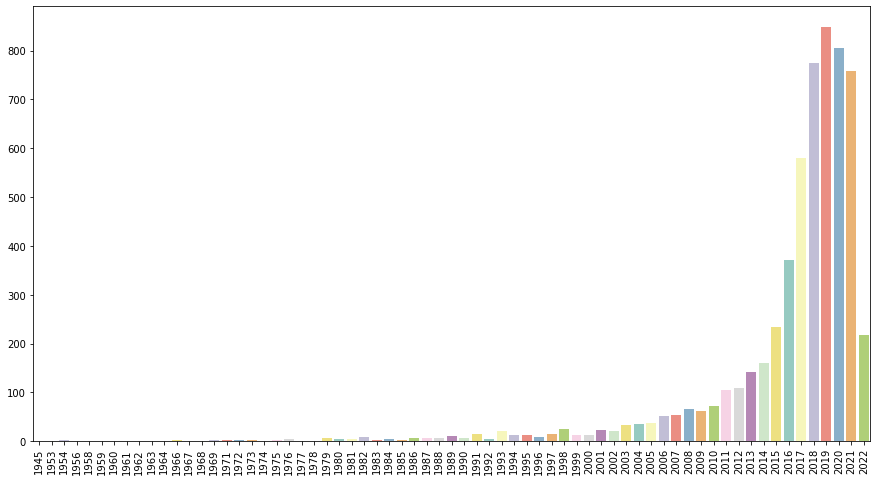

In [20]:
#Se realiza un gráfico de barras
plt.figure(figsize = (15,8))
a=df['release_year'].value_counts()
sns.barplot(x=a.index, y=a.values, palette='Set3')
plt.xticks(rotation=90)
plt.show()

<h4>Podemos visualizar los mismos datos pero de otra manera, en lugar de un gráfico de barras, vemos un gráfico de líneas.

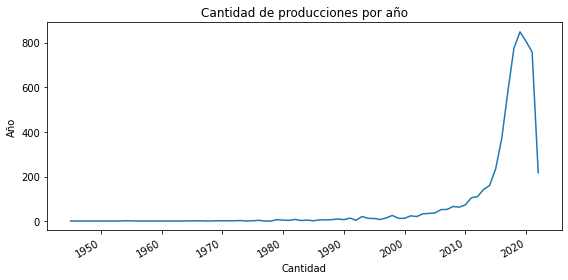

In [21]:
anio = df['release_year']
y = anio.value_counts().sort_index(ascending=True) 
y.plot(kind='line', figsize=(8, 4)) # Graficar la serie de tiempo
plt.gcf().autofmt_xdate() # Darle formato fecha al eje x
plt.title('Cantidad de producciones por año')
plt.xlabel('Cantidad')
plt.ylabel('Año')
plt.tight_layout() # Ajustar los ejes 
sns.set_palette('Set3')
plt.show()

<h4>Con las columnas de 'imdb_score' y 'seasons' podemos analizar el puntaje de las series en función de la cantidad de temporadas estrenadas.
<br><br>La dispersión de la siguiente gráfica de puntos nos muestra una tendencia, de que aquellas series con muchas temporadas, pueden tener buenos puntajes. El siguiente análisis es, si las series tiene buen puntaje y los productores realizan más temporadas o, si las series con muchas temporadas resultan mejor puntuadas por la audiencia.

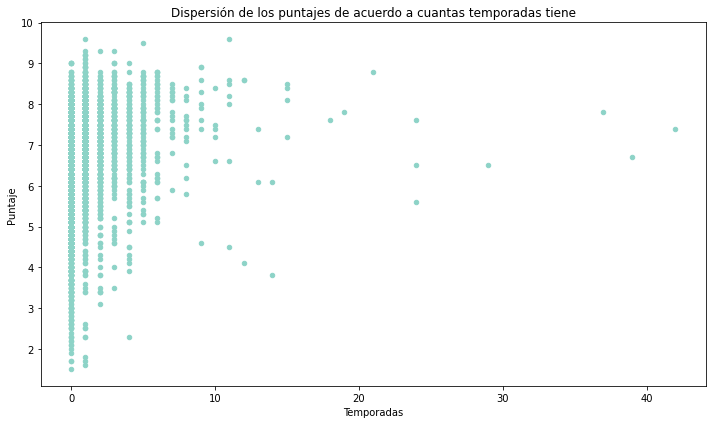

In [22]:
df.plot(kind='scatter', x='seasons', y='imdb_score', figsize=(10,6))
plt.title('Dispersión de los puntajes de acuerdo a cuantas temporadas tiene')
plt.xlabel('Temporadas')
plt.ylabel('Puntaje')
plt.tight_layout() # Ajustar los ejes 
sns.set_palette('Set3')
plt.show()

<h4>Lo que buscamos observar con la próxima gráfica es la valoración respecto a la duración del show o película, no se puede concluir mucho por su dispersión.
<br><br>Trabajamos con las columnas 'runtime' e 'imdb_score'

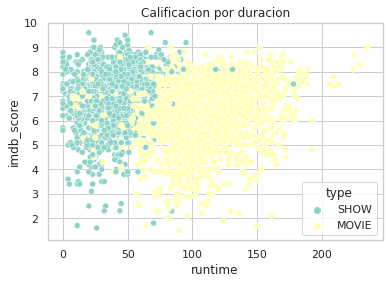

In [23]:
sns.set_theme(style='whitegrid', palette='Set3')
sns.scatterplot(data=df, x="runtime", y="imdb_score", hue="type", sizes=(8, 6))
plt.title("Calificacion por duracion")
# Ajustar los ejes 
#f.tight_layout()
plt.show()





<h4>Muestra la cantidad total de Shows o Movies de la base de datos

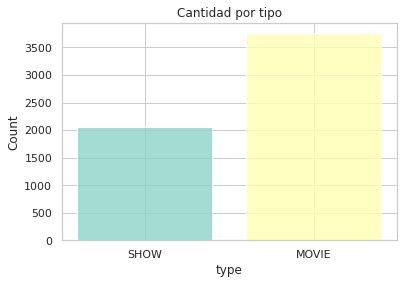

In [24]:
sns.histplot(data=df, x="type", hue="type", shrink=.8, alpha=.8, legend=False, palette='Set3')
plt.title("Cantidad por tipo")
plt.show()

<h4>En la siguiente gráfica observamos la cantidad de producciones que se realizaron en toda la serie de tiempo para las distintas clasificaciones por edad.
<br><br>Para ello trabajamos con la columna 'age_certification' y usamos la función de contar.


In [25]:
#tomo la columna age_certification para hacer la grafica de barras
edades=df.age_certification.value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


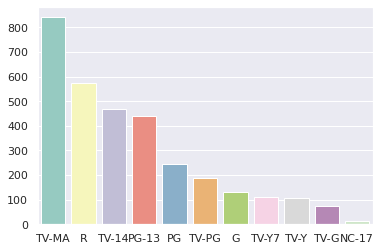

In [26]:
sns.set_theme(palette='Set3')
sns.barplot(edades.index,edades.values)

plt.show()

### ¿Quiénes son los televidentes que mejor clasifican las películas?

<h4>Esta pregunta plantea trabajar con las columnas 'age_certification' versus 'imdb_score'

In [27]:
df['age_certification'].unique()

array(['TV-MA', 'R', 'PG', 'TV-14', 'G', 'PG-13', nan, 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

De acuerdo a la información de Netflix (https://help.netflix.com/es/node/2064/us):

<ul><strong>Niños</strong>
<li> TV-Y: Pensada como apropiada para todos los niños
<li> TV-Y7: Adecuada para niños a partir de los 7 años
<li> G: Adecuada para público en general
<li> TV-G: Adecuada para público en general
<li> PG: Se sugiere orientación de los padres
<li> TV-PG: Se sugiere orientación de los padres
</ul><br>
<ul><strong>Adolescentes</strong>
<li> PG-13: Se advierte enfáticamente a los padres.Puede ser inapropiada para niños de 12 años y menores.
<li> TV-14: Se advierte enfáticamente a los padres.Puede ser inadecuada para niños de 14 años y menores.
</ul><br>
<ul><strong>Adultos</strong>
<li> R: Restringida.Puede ser inapropiada para niños de 17 años y menores.
<li> TV-MA: Para público adulto.Puede ser inadecuada para niños de 17 años y menores.
<li> NC-17:Inapropiada para niños de 17 años y menores
</ul>


Por lo tanto, podemos separar estas categorías de acuerdo a si son para niños, adolescentes o adultos.


Debemos tener en cuenta que en la categoría Nilios, incluimos el contenido apto para todo público.

In [28]:
#df.isna().sum()
#df.groupby('age_certification').count()

In [29]:
#Crear un dataframe igual al original para modificarlo
df2 = df
# Crear un DF en el que se eliminen las filas donde la 'age_certification' sea NAN
df2_sin_nan = df2[df2.age_certification.notnull()]
# Añadir nueva columna basada en la clasificación:
map_dictionary ={'TV-PG' : "Ninios", 'TV-Y' : "Ninios",'TV-G' : "Ninios",'TV-Y7' : "Ninios",'PG' : "Ninios",'G' : "Ninios", 'TV-14' : "Adolescentes",'PG-13' : "Adolescentes", 'R': "Adultos", 'TV-MA':"Adultos", 'NC-17': "Adultos"}
df2_sin_nan['Edad']= df2_sin_nan['age_certification'].map(map_dictionary)
#print(df2.head(20))
#print()
#print(df2_sin_nan.head())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


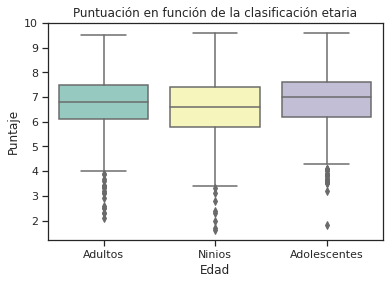

In [30]:
#procedemos a graficar las puntuaciones de las producciones en un gráfico de cajas, en función
#de la franja etaria que clasifica: Niños, Adolescentes, Adultos.
sns.set_theme(style='ticks', palette='Set3')
sns.boxplot(data=df2_sin_nan, x="Edad", y="imdb_score")
plt.title('Puntuación en función de la clasificación etaria')
plt.xlabel("Edad");
plt.ylabel("Puntaje");
# Ajustar los ejes 
#f.tight_layout()
plt.show()

<h5><strong>Quienes mejor clasifican las producciones con los adolescentes, pero la distribución y la media es bastante similar para todas las edades
</h4>

### ¿Han mejorado las puntuaciones en los últimos años de las películas para niños?

<h4>Separaremos las películas de tipo de producción (columna 'type'), luego aquellas con calificación para niños de la columna 'age_certificaction', analizaremos la columna de puntuaciones 'imdb_score' o 'tmdb_score' en función de los años.

In [31]:
df_pelis = df2_sin_nan[df2_sin_nan['type']=='MOVIE']
df_pelis_ninios = df_pelis[df_pelis['Edad']=='Ninios']
#df_pelis_ninios.head()

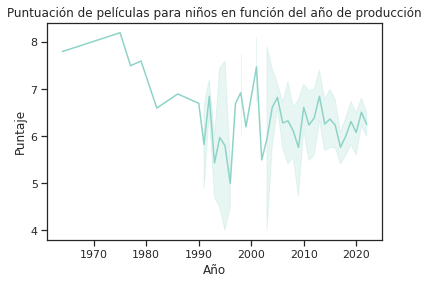

In [32]:
sns.set_theme(style='ticks', palette='Set3')
sns.lineplot(data=df_pelis_ninios, x="release_year", y="imdb_score")
plt.title('Puntuación de películas para niños en función del año de producción')
plt.xlabel("Año");
plt.ylabel("Puntaje");
# Ajustar los ejes 
#f.tight_layout()
plt.show()

<h5><strong>La puntuación promedio de las películas para niños a lo largo de los años ha ido disminuyendo. Debemos tener en cuenta que en las primeras décadas de los datos no se observa dispersión de puntación debido seguramente a las pocas producciones de esos años. Sin embargo, en la década del 90 encontramos películas con puntuaciones promedios muy superiores a la media y otras muy inferiores. Acercándonos al 2020, las puntuaciones se encuentran alrededor de los 6/10 puntos.
Investigando un poco más este resultado, la empresas productoras podrían decidir sobre el tipo de películas que más atraen a los niños para proponer futuras producciones.

### ¿Cuál es el top 10 de películas para adultos? 

<h4>(Analizaremos la puntuaciones de la películas, ordenarlas, ver los 10 primeros datos.)


In [33]:
df_pelis_adultos = df_pelis[df_pelis['Edad']=='Adultos']
pelis_adultos_ordenadas = df_pelis_adultos.sort_values(["imdb_score"], ascending=False)
#pelis_adultos_ordenadas.head(10)

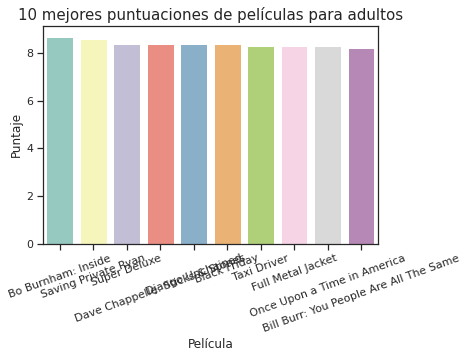

In [34]:
sns.set_theme(style='ticks', palette='Set3')
sns.barplot(data=pelis_adultos_ordenadas.head(10), x="title", y="imdb_score")
plt.title('10 mejores puntuaciones de películas para adultos', fontsize=15)
plt.xlabel("Película");
plt.ylabel("Puntaje");
# Ajustar los ejes 
#f.tight_layout()
plt.rcParams["figure.figsize"] = (10,5)
plt.xticks(rotation=20)
plt.show()


<h5><strong>Estas son las 10 películas de adultos mejores puntuadas en la plataforma de Netflix

###¿y de series?
<h4>Haremos el mismo análisis, pero separando series de 'type'.

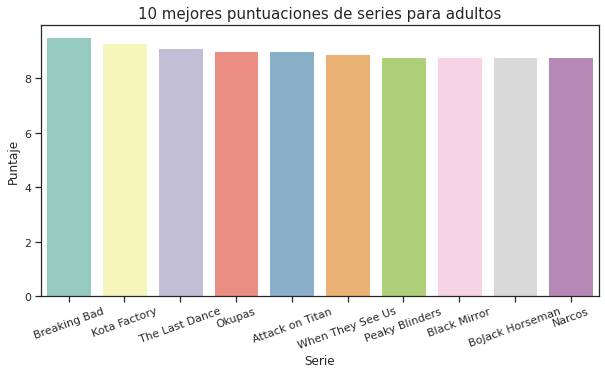

In [35]:
df_series = df2_sin_nan[df2_sin_nan['type']=='SHOW']
df_series_adultos = df_series[df_series['Edad']=='Adultos']
series_adultos_ordenadas = df_series_adultos.sort_values(["imdb_score"], ascending=False)
#series_adultos_ordenadas.head(10)
sns.set_theme(style='ticks', palette='Set3')
sns.barplot(data=series_adultos_ordenadas.head(10), x="title", y="imdb_score")
plt.title('10 mejores puntuaciones de series para adultos', fontsize=15)
plt.xlabel("Serie");
plt.ylabel("Puntaje");
# Ajustar los ejes 
#f.tight_layout()
plt.rcParams["figure.figsize"] = (18,5)
plt.xticks(rotation=20)
plt.show()

<h5><strong>Se observan las 10 series mejor puntuadas para adultos en Netflix

###¿En qué año se produjeron más películas?


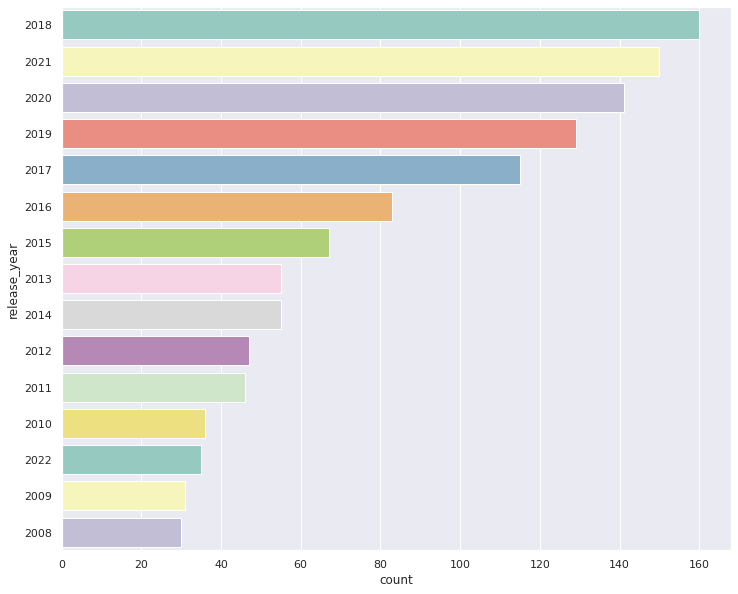

In [36]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_pelis, palette="Set3", order=df_pelis['release_year'].value_counts().index[0:15])

<h5>Observamos que el año en qué más películas se produjeron fue el 2018

###¿Cuales con las 5 series con más de 5 temporadas mejores calificadas?
<h4>Separamos las series de 'type', separar de la columna 'seasons' las que tienen desde 6 en adelante, ordenar por puntajes y visualizar las primeras 5.

In [37]:
df_series.columns

Index(['title', 'type', 'description', 'release_year', 'age_certification',
       'runtime', 'genres', 'production_countries', 'seasons', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'Edad'],
      dtype='object')

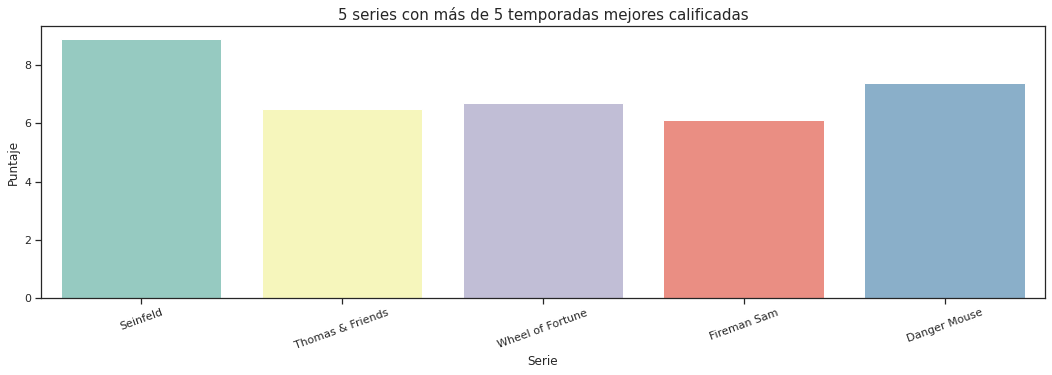

In [38]:
series_ordenadas = df_series.sort_values(["imdb_score"], ascending=False)
df_series_mas5 = df_series[df_series['seasons']>=6]
#df_series_mas5.head()
sns.set_theme(style='ticks', palette='Set3')
sns.barplot(data=df_series_mas5.head(), x="title", y="imdb_score")
plt.title('5 series con más de 5 temporadas mejores calificadas', fontsize=15)
plt.xlabel("Serie");
plt.ylabel("Puntaje");

plt.rcParams["figure.figsize"] = (18,5)
plt.xticks(rotation=20)
plt.show()

In [39]:
'''def convert_to_series(dataframe):
    genres = []
    production_country = []
    seasons = []
    production_total = [x.replace("[", "").replace("]", "").replace("'", "").split(",")[0] for x in dataframe["production_countries"].value_counts().sort_values(ascending=False).keys().unique()[:21]]
    for row in dataframe["genres"]:
        row_modified = row.replace("[", "").replace("]", "").replace("'", "").split(",")
        for genre in row_modified:
            genres.append(genre)
    for row in dataframe["production_countries"]:
        row_modified = row.replace("[", "").replace("]", "").replace("'", "").split(",")
        for country in row_modified:
            if country in production_total:
                production_country.append(country)
    for row in df2_sin_nan[~df2_sin_nan["seasons"].isna()]["seasons"]:
            seasons.append(int(row))
    genres_df = pd.DataFrame(genres)
    production_df = pd.DataFrame(production_country)
    seasons_df = pd.DataFrame(seasons)
    return genres_df, production_df, seasons_df

genres, production_country, seasons = convert_to_series(df2_sin_nan)
genres = genres.drop(axis = 0, index = 36)
production_country = production_country[production_country[0] != '']'''

'def convert_to_series(dataframe):\n    genres = []\n    production_country = []\n    seasons = []\n    production_total = [x.replace("[", "").replace("]", "").replace("\'", "").split(",")[0] for x in dataframe["production_countries"].value_counts().sort_values(ascending=False).keys().unique()[:21]]\n    for row in dataframe["genres"]:\n        row_modified = row.replace("[", "").replace("]", "").replace("\'", "").split(",")\n        for genre in row_modified:\n            genres.append(genre)\n    for row in dataframe["production_countries"]:\n        row_modified = row.replace("[", "").replace("]", "").replace("\'", "").split(",")\n        for country in row_modified:\n            if country in production_total:\n                production_country.append(country)\n    for row in df2_sin_nan[~df2_sin_nan["seasons"].isna()]["seasons"]:\n            seasons.append(int(row))\n    genres_df = pd.DataFrame(genres)\n    production_df = pd.DataFrame(production_country)\n    seasons_df = pd.D

In [40]:
#generos_total=genres.value_counts()
#generos_total.head()

###¿Cuántas series/películas hay por género?

In [41]:
df["genres"] = df["genres"].apply(lambda x: re.findall("\w+", x))

genres = list(df["genres"].values)
genres = list(set([item for sublist in genres for item in sublist]))

for i, genre in enumerate(genres):
    df[genre] = df.genres.apply(lambda x: 1 if genre in x else 0).astype(int)

print("Number of Genres: ", len(genres))
print("Genres:", genres)

Number of Genres:  19
Genres: ['documentation', 'action', 'european', 'history', 'fantasy', 'war', 'reality', 'crime', 'western', 'thriller', 'family', 'romance', 'sport', 'animation', 'drama', 'comedy', 'scifi', 'horror', 'music']


In [42]:
genre_movie_dict = {}

for genre in genres:
    genre_movie_dict[genre] = df.query("type == 'MOVIE'")[genre].sum()

genre_movie_dict = dict(sorted(genre_movie_dict.items(), key=lambda x: x[0]))

genre_series_dict = {}

for genre in genres:
    genre_series_dict[genre] = df.query("type == 'SHOW'")[genre].sum()

genre_series_dict = dict(sorted(genre_series_dict.items(), key=lambda x: x[0]))

fig = sp.make_subplots(
    rows=2,
    cols=1,
    subplot_titles=["Películas", "Series"],
)

genre_movie_count = go.Bar(
    x=list(genre_movie_dict.keys()),
    y=list(genre_movie_dict.values()),
    marker=dict(color=list(genre_movie_dict.values()),
                colorscale=px.colors.qualitative.Dark2),
    name="Películas",
)

genre_series_count = go.Bar(
    x=list(genre_series_dict.keys()),
    y=list(genre_series_dict.values()),
    marker=dict(color=list(genre_series_dict.values()),
                colorscale=px.colors.qualitative.Dark2),
    name="Series",
)

fig.add_trace(genre_movie_count, row=1, col=1)
fig.update_xaxes(title_text="Género", row=1, col=1)
fig.update_yaxes(title_text="Cantidad", row=1, col=1)

fig.add_trace(genre_series_count, row=2, col=1)
fig.update_xaxes(title_text="Género", row=2, col=1)
fig.update_yaxes(title_text="Cantidad", row=2, col=1)

fig.update(
    layout_title_text="Cantidad de películas o series por género",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_template="plotly",
    layout_showlegend=False,
    layout_height=800,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.update_annotations(font_size=18)

fig.show()

##¿Cuál es la duración más frecuente de las  películas?

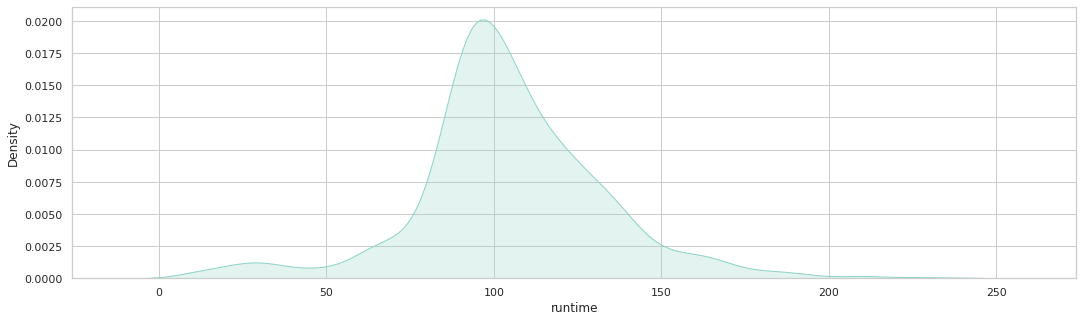

In [43]:
sns.set(style='whitegrid', palette = 'Set3')
sns.kdeplot(data=df_pelis['runtime'], shade=True)
plt.show()

<h4>Por lo tanto, una buena cantidad de películas en Netflix tienen una duración de 75 a 125 minutos.

#**Conclusión**
##El dataset elegido permite realizar muchas proyecciones respecto a los géneros de las producciones, cantidad de temporadas, público destinatario.

<h3>Tiene mucho potencial para generar disparadores en las productoras de contenido
<br>
Seguir trabajándolo permitirá responder preguntas específicas como las planteadas en la hipótesis y será útil para generar una recomendación de acuerdo a los puntajes, los genéros, el país de producción.

FALTAAAAA
<h6>¿Cómo se califican las películas de terror frente a las comedias? Separar las películas de 'type'. De la columna 'genres' separar las de terror en un set y en otro las comedias. Comparar los puntajes en un gráfico con la/s columna/s de puntaje.